#SVM model Training to Predict Cancer Class's using Sample Cancer DataSet

##Required Modules

In [0]:
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler  #To assemble the Independent Variable
from pyspark.ml.classification import LinearSVC #SVM linear Model

In [0]:
display(dbutils.fs.ls("/FileStore/ML"))

path,name,size,modificationTime
dbfs:/FileStore/ML/cell_samples.csv,cell_samples.csv,20675,1704189430000
dbfs:/FileStore/ML/tips.csv,tips.csv,8188,1702458164000


In [0]:
df_cancer=spark.read.option('header','true').option('inferSchema','true').csv('dbfs:/FileStore/ML/cell_samples.csv')

In [0]:
df_cancer.summary().display()

summary,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683,683,683,683,683,683,683,683,683,683,683
mean,1076720.2269399706,4.44216691068814,3.150805270863836,3.2152269399707176,2.830161054172767,3.234260614934114,3.5446559297218156,3.445095168374817,2.869692532942899,1.603221083455344,1.0
stddev,620644.0476548711,2.8207613188371266,3.0651448557860426,2.9885808183250244,2.864562190446995,2.2230854564417952,3.643857160492912,2.449696572512872,3.0526664070473566,1.7326741463370268,0.0
min,63375,1,1,1,1,1,1,1,1,1,1
25%,877291,2,1,1,1,2,1,2,1,1,1
50%,1171795,4,1,1,1,2,1,3,1,1,1
75%,1238777,6,5,5,4,4,6,5,4,1,1
max,13454352,10,10,10,10,10,10,10,10,10,1


In [0]:
#Features present in DataFrame
df_cancer.columns
df_cancer.dtypes

Out[6]: [('ID', 'int'),
 ('Clump', 'int'),
 ('UnifSize', 'int'),
 ('UnifShape', 'int'),
 ('MargAdh', 'int'),
 ('SingEpiSize', 'int'),
 ('BareNuc', 'string'),
 ('BlandChrom', 'int'),
 ('NormNucl', 'int'),
 ('Mit', 'int'),
 ('Class', 'int')]

#Column 'Class' has the catogorical value of Cancer Class's

##IF "Class"== '2' its 'Benign Cancer Class'
##IF "Class"== '4' its 'Malignant Cancer Classes'

#Analysis on the DataSet Using Scatter Plot

In [0]:
df_benign=df_cancer.filter(col("Class") == 2 ).toPandas()
df_malignant=df_cancer.filter(col("Class") == 4).toPandas()

Out[31]: <AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

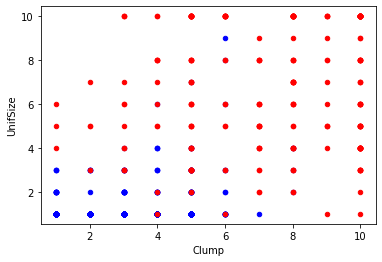

In [0]:
axis=df_benign.plot(kind='scatter',x='Clump',y='UnifSize',color='blue')
df_malignant.plot(kind='scatter',x='Clump',y='UnifSize',color='red',ax=axis)

##Feature Engineering for model development

In [0]:
df_cancer.dtypes

Out[10]: [('ID', 'int'),
 ('Clump', 'int'),
 ('UnifSize', 'int'),
 ('UnifShape', 'int'),
 ('MargAdh', 'int'),
 ('SingEpiSize', 'int'),
 ('BareNuc', 'string'),
 ('BlandChrom', 'int'),
 ('NormNucl', 'int'),
 ('Mit', 'int'),
 ('Class', 'int')]

In [0]:
df_cancer = df_cancer.withColumn(
    "BareNuc",
    when(col("BareNuc").cast("integer").isNotNull(), col("BareNuc").cast("integer"))
    .otherwise(None))

In [0]:
df_cancer=df_cancer.na.drop()

In [0]:
df_cancer.display()

ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2
1017122,8,10,10,8,7,10.0,9,7,1,4
1018099,1,1,1,1,2,10.0,3,1,1,2
1018561,2,1,2,1,2,1.0,3,1,1,2
1033078,2,1,1,1,2,1.0,1,1,5,2
1033078,4,2,1,1,2,1.0,2,1,1,2


In [0]:
df_cancer.dtypes

Out[19]: [('ID', 'int'),
 ('Clump', 'int'),
 ('UnifSize', 'int'),
 ('UnifShape', 'int'),
 ('MargAdh', 'int'),
 ('SingEpiSize', 'int'),
 ('BareNuc', 'double'),
 ('BlandChrom', 'int'),
 ('NormNucl', 'int'),
 ('Mit', 'int'),
 ('Class', 'int')]

In [0]:
df_cancer = df_cancer.withColumn("Class", when(col("Class") == 2, 0).otherwise(1))

In [0]:
Features=VectorAssembler(inputCols=['Clump','UnifSize','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit'],outputCol='Ind_features')
Final_df=Features.transform(df_cancer)

###"Ind_features" - Independent Variable
###'Class' - Dependent Variable

In [0]:
df_final=Final_df.select('Ind_features','Class')
df_final.show()

+--------------------+-----+
|        Ind_features|Class|
+--------------------+-----+
|[5.0,1.0,1.0,2.0,...|    1|
|[5.0,4.0,5.0,7.0,...|    1|
|[3.0,1.0,1.0,2.0,...|    1|
|[6.0,8.0,1.0,3.0,...|    1|
|[4.0,1.0,3.0,2.0,...|    1|
|[8.0,10.0,8.0,7.0...|    1|
|[1.0,1.0,1.0,2.0,...|    1|
|[2.0,1.0,1.0,2.0,...|    1|
|[2.0,1.0,1.0,2.0,...|    1|
|[4.0,2.0,1.0,2.0,...|    1|
|[1.0,1.0,1.0,1.0,...|    1|
|[2.0,1.0,1.0,2.0,...|    1|
|[5.0,3.0,3.0,2.0,...|    1|
|[1.0,1.0,1.0,2.0,...|    1|
|[8.0,7.0,10.0,7.0...|    1|
|[7.0,4.0,4.0,6.0,...|    1|
|[4.0,1.0,1.0,2.0,...|    1|
|[4.0,1.0,1.0,2.0,...|    1|
|[10.0,7.0,6.0,4.0...|    1|
|[6.0,1.0,1.0,2.0,...|    1|
+--------------------+-----+
only showing top 20 rows



In [0]:
train_data,test_data=df_final.randomSplit([0.75,0.25],seed=42)

###Using Linear SVM 

In [0]:
svm = LinearSVC(maxIter=10, regParam=0.1, featuresCol="Ind_features", labelCol="Class")

In [0]:
model = svm.fit(train_data)

In [0]:
prediction_model=model.evaluate(test_data)

In [0]:
prediction_model.predictions.show()

+--------------------+-----+--------------------+----------+
|        Ind_features|Class|       rawPrediction|prediction|
+--------------------+-----+--------------------+----------+
|[1.0,1.0,1.0,1.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,1.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,1.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,1.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,1.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,2.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,2.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,2.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,2.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,2.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,2.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,2.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,2.0,...|    1|[-2.0420504999999...|       1.0|
|[1.0,1.0,1.0,2.0,...|  

In [0]:
# prediction_model.accuracy , prediction_model.recallByLabel
spark.conf.set("spark.sql.execution.arrow.pyspark.fallback.enabled", "true")

print("Accuracy: {:.2f}".format(prediction_model.accuracy))

Accuracy: 1.00


In [0]:
coefficients = model.coefficients
coefficients_array = coefficients.toArray()
print("Coefficient Matrix:")
print(coefficients_array)

Coefficient Matrix:
[ 7.73051370e-16  5.65401986e-16  0.00000000e+00  1.92173072e-16
  3.55997419e-16  1.58410253e-15 -6.99013556e-17  1.22072921e-15]


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-2913975863028410>:2
      1 summary = model.summary
----> 2 if 'accuracy' in summary.metrics:
      3     print("Accuracy: {:.2f}".format(summary.metrics['accuracy']))
      4 if 'weightedPrecision' in summary.metrics:

AttributeError: 'function' object has no attribute 'metrics'